In [1]:
#https://github.com/olgaliak/detection-amlworkbench/tree/master/assets
#!wget https://olgalicodestory.blob.core.windows.net/kittiwakedata/kittiwake_labled.zip
#!unzip kittiwake_labled.zip
#!rm kittiwake_labled.zip

In [2]:
import os
import glob
import json
import numpy as np
from PIL import Image
from chainercv.visualizations import vis_bbox  # todo

/anaconda/envs/py35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
PATH = "kittiwake_labled/"

In [5]:
# Load images
TRAIN_IMGS = glob.glob(os.path.join(PATH, "train/*.JPG"))
print(len(TRAIN_IMGS))
EVAL_IMGS = glob.glob(os.path.join(PATH, "eval/*.JPG"))
print(len(EVAL_IMGS))

160
53


In [6]:
# Load annotations
with open(os.path.join(PATH, "train.json"), 'r') as annofile:
    train_json_anno = json.load(annofile)
with open(os.path.join(PATH, "eval.json"), 'r') as annofile:
    eval_json_anno = json.load(annofile)

In [7]:
def display_img(nmbr, dta=TRAIN_IMGS, anno=train_json_anno):
    img_loc = dta[nmbr]
    # BBox
    img_no = str(int(os.path.basename(os.path.splitext(img_loc)[0])))
    print(img_no)
    boxes = np.array([(imanno['y1'], imanno['x1'], imanno['y2'], imanno['x2']) 
                      for imanno in anno['frames'][img_no]])
    # Rescale (seem fixed to this size even if different in frames)
    h, w = 952, 1269
    print(anno['frames'][img_no][0]['width'], anno['frames'][img_no][0]['height'])
    img = Image.open(img_loc).resize((w, h))
    img = np.array(img)
    img = np.moveaxis(img,-1,0)
    # Viz
    vis_bbox(img, boxes)

39
1269 952


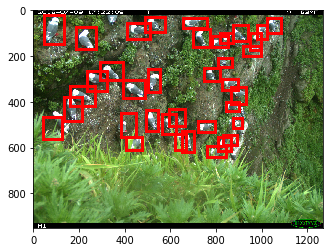

In [8]:
# Random image
display_img(90)

In [10]:
# Visualise all
#for i in range(len(TRAIN_IMGS)):
#    print(display_img(i))